# PARTE 32: CLUSTERING

## PARTE 32.1: TEORÍA DE CLUSTERING

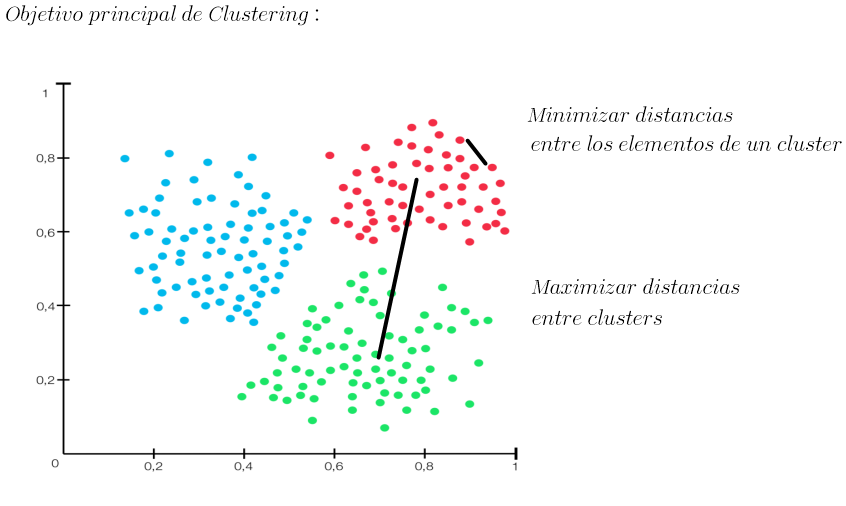

In [1]:
from IPython.display import Image
Image(filename="RECURSOS - CERTIFICACIÓN/OBJETIVOS CLUSTERING.png")

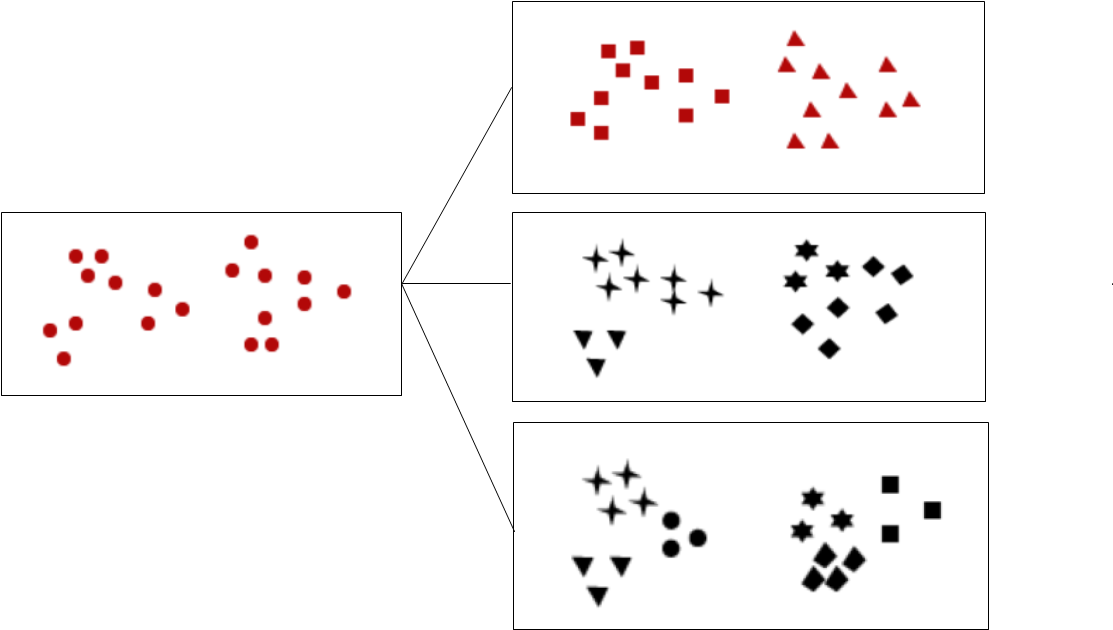

In [2]:
from IPython.display import Image
Image(filename="RECURSOS - CERTIFICACIÓN/CLUSTERING GRÁFICAMENTE.png")

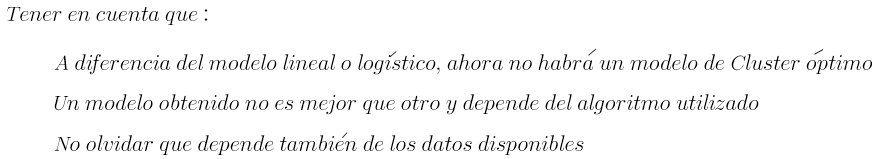

In [3]:
from IPython.display import Image
Image(filename="RECURSOS - CERTIFICACIÓN/CONSIDERACIONES CLUSTER.png")

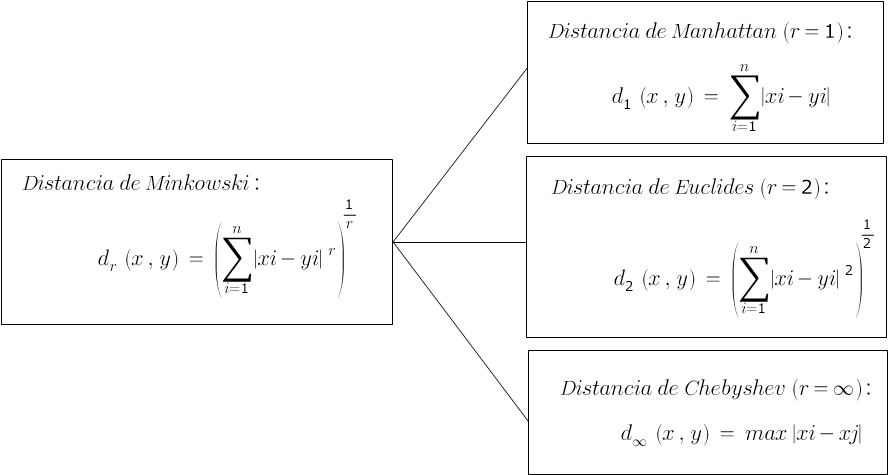

In [4]:
from IPython.display import Image
Image(filename="RECURSOS - CERTIFICACIÓN/DISTANCIAS MÉTRICAS.png")

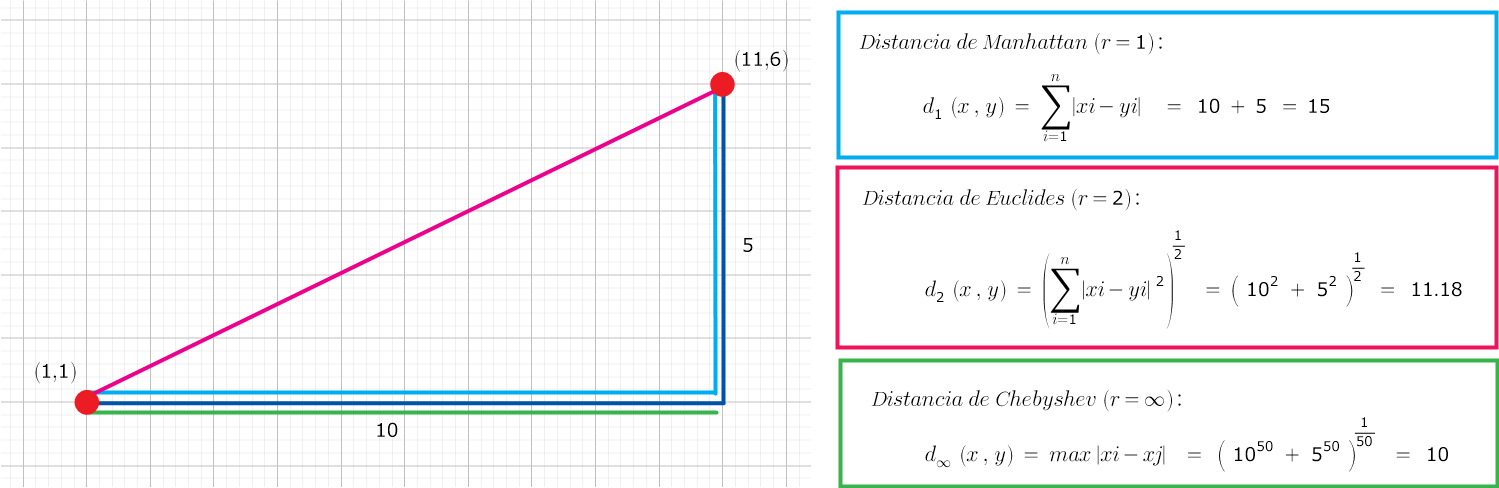

In [5]:
from IPython.display import Image
Image(filename="RECURSOS - CERTIFICACIÓN/EXPLICACIÓN DISTANCIAS.png")

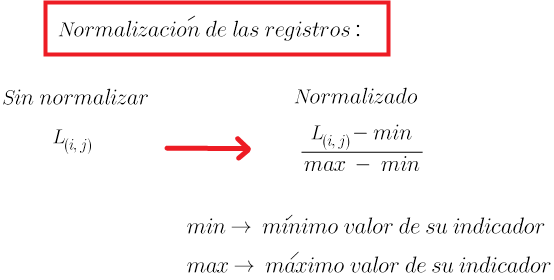

In [6]:
from IPython.display import Image
Image(filename="RECURSOS - CERTIFICACIÓN/NORMALIZACIÓN DE REGISTROS.png")

## PARTE 32.2: ANÁLISIS DE DATASET

In [7]:
import pandas as pd
RUTA = "DATASETS - CERTIFICACIÓN/32_2_CLUSTERING_BANCOS.csv"
DATASET = pd.read_csv(RUTA)
DATASET = DATASET.dropna(how="any", axis = 0)
DATASET = DATASET.drop(["CUST_ID"],axis = 1)
DATASET

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


#### DETALLE DE COLUMNAS

* CUST_ID: Identificación del titular de la tarjeta de crédito (categórico)
* BALANCE: Cantidad de saldo que queda en su cuenta para realizar compras
* BALANCE_FREQUENCY: Frecuencia con la que se actualiza el saldo, puntuación entre 0 y 1 (1 = se actualiza con frecuencia, 0 = no se actualiza con frecuencia)
* PURCHASES: Cantidad de compras realizadas desde la cuenta
* ONEOFF_PURCHASES: Importe de compra realizado en pago único
* INSTALLMENTS_PURCHASES: Importe de la compra realizada a plazos
* CASH_ADVANCE: Anticipo dado por el usuario
* PURCHASES_FREQUENCY: Frecuencia con la que se realizan las compras, puntuación entre 0 y 1 (1 = compras frecuentes, 0 = compras no frecuentes)
* ONEOFF_PURCHASES_FREQUENCY: Frecuencia con la que se realizan compras al contado (1 = compras frecuentes, 0 = compras no frecuentes)
* PURCHASES_INSTALLMENTS_FREQUENCY: Con qué frecuencia se realizan las compras a plazos (1 = se realizan con frecuencia, 0 = no se realizan con frecuencia)
* CASH_ADVANCE_FREQUENCY: Frecuencia con la que se paga el anticipo en efectivo
* CASH_ADVANCE_TRX: Número de transacciones realizadas con "Cash in Advanced"
* PURCHASES_TRX: Número de transacciones de compra realizadas
* CREDIT_LIMIT: Límite de tarjeta de crédito para el usuario
* PAYMENTS: Monto del pago realizado por el usuario
* MINIMUM_PAYMENTS: Cantidad mínima de pago que debe realizar el usuario
* PRC_FULL_PAYMENT: Porcentaje del pago total pagado por el usuario
* TENURE: Tenencia del servicio de tarjeta de crédito para el usuario


In [8]:
DATASET["TENURE"].value_counts()

12    7346
11     356
10     226
6      184
8      183
7      177
9      164
Name: TENURE, dtype: int64

In [9]:
#ANALIZAR VALORES FALTANTES Y COMPORTAMIENTO DE COLUMNAS
DATASET.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [10]:
#VALORES FALTANTES
COLUMNAS = DATASET.columns.tolist()

for X in COLUMNAS:
    if DATASET[X].isna().sum() > 0:
        print(X,"-->",DATASET[X].isna().sum())

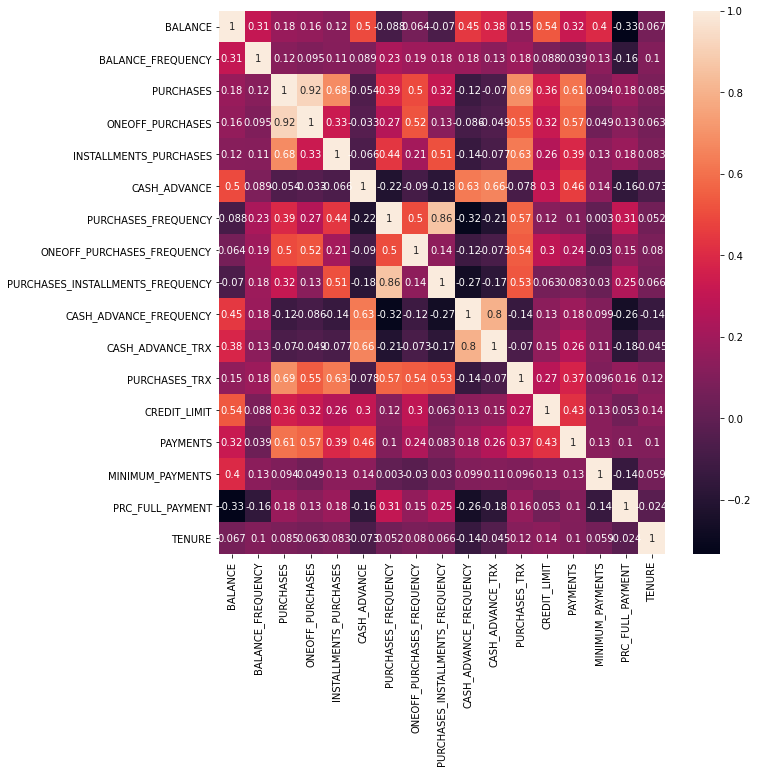

In [11]:
#CORRELACIÓN ENTRE COLUMNAS
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,10))
sns.heatmap(DATASET.corr(), annot = True)
plt.show()

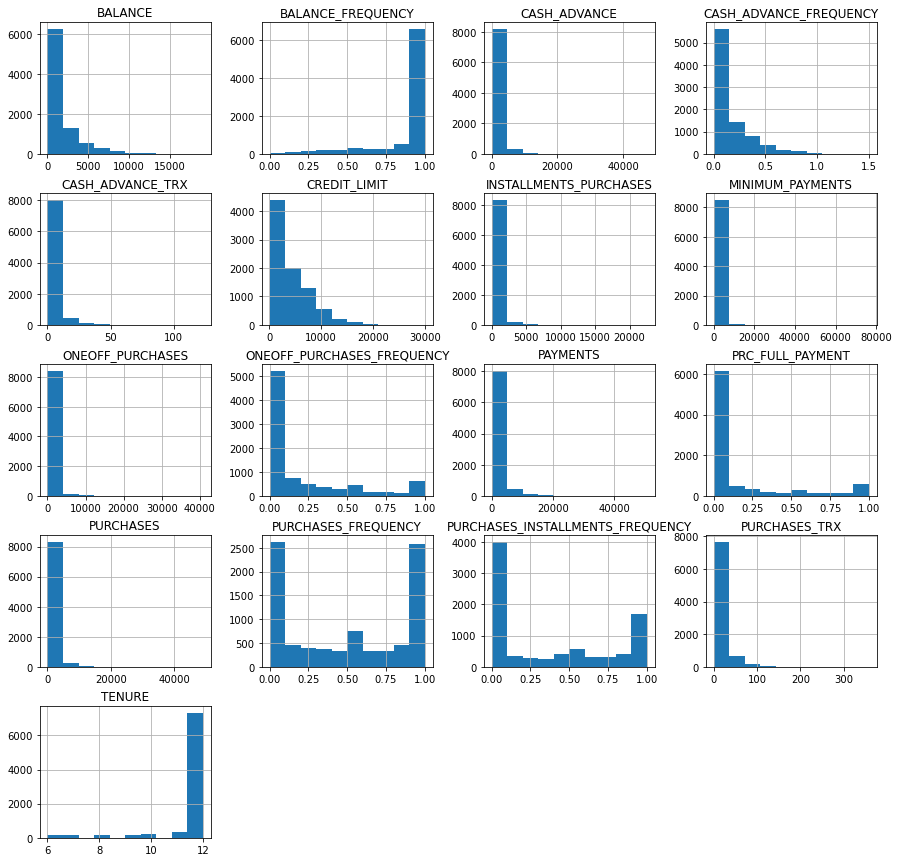

In [12]:
#FRECUENCIA DE CADA VALOR
import matplotlib.pyplot as plt
DATASET.hist(figsize=(15,15))
plt.show()

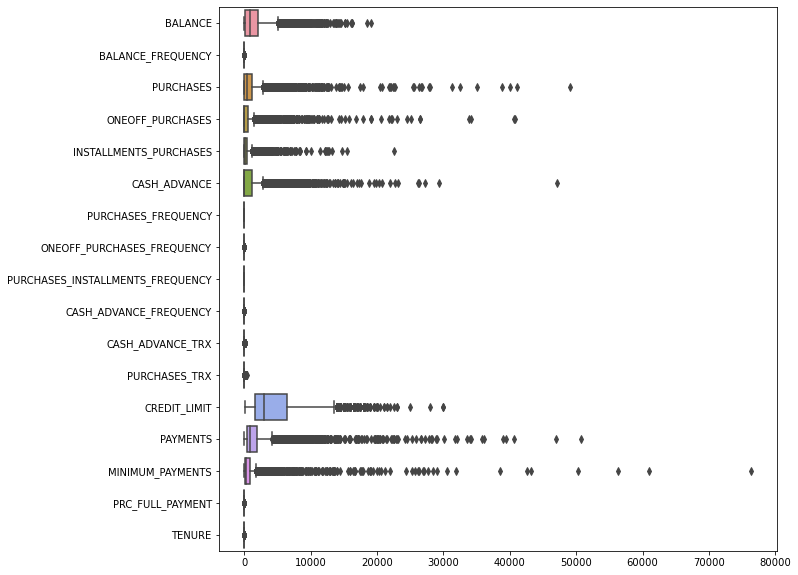

In [13]:
#ANÁLISIS DE OUTLIERS
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,10))
sns.boxplot(data = DATASET, orient = "h")
plt.show()

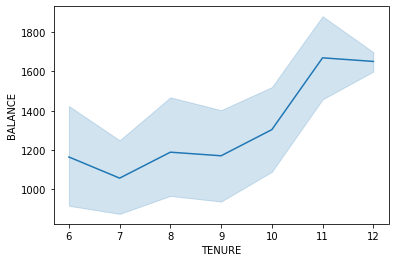

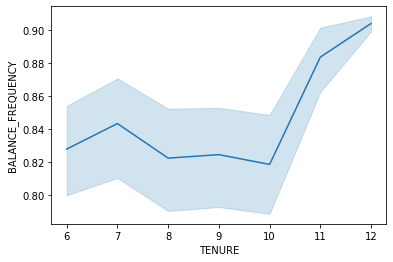

In [14]:
#ANALIZAR COMPORTAMIENTO MEDIANTE LINEPLOT
import seaborn as sns
sns.lineplot(x = 'TENURE' ,  y = 'BALANCE',   data = DATASET)
plt.show()
sns.lineplot(x = 'TENURE' ,  y = 'BALANCE_FREQUENCY',   data = DATASET)
plt.show()

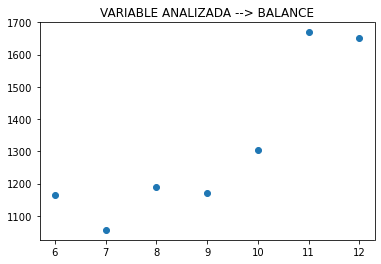

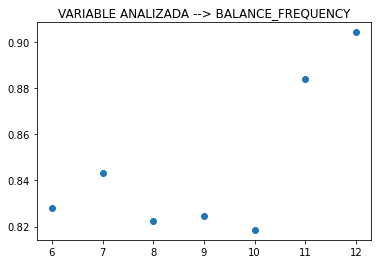

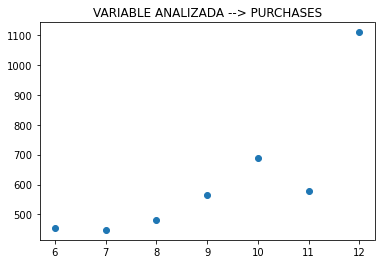

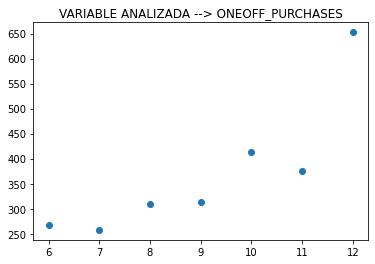

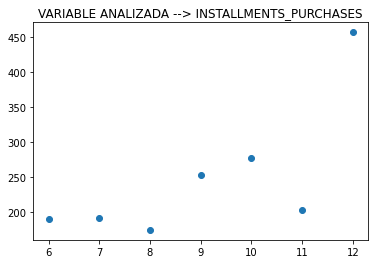

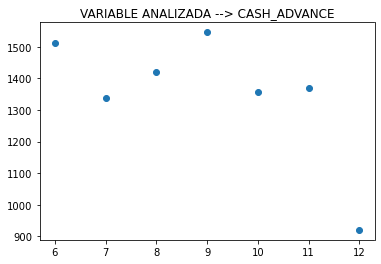

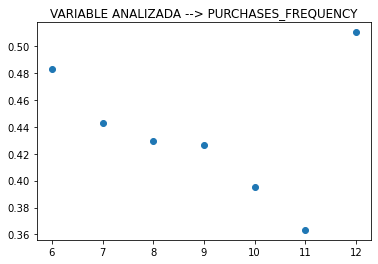

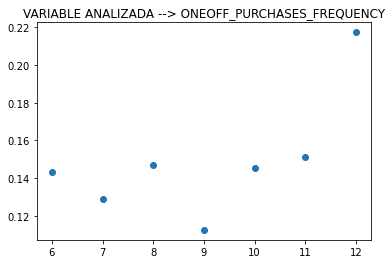

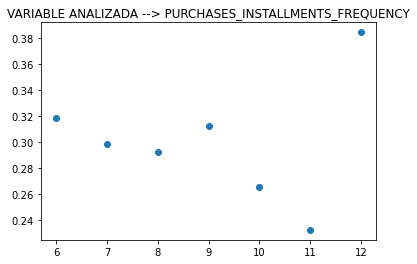

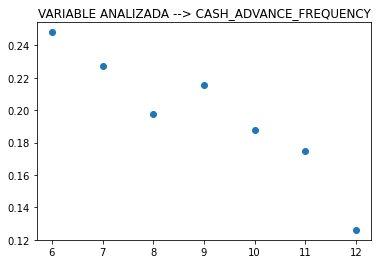

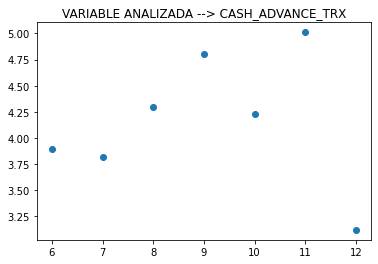

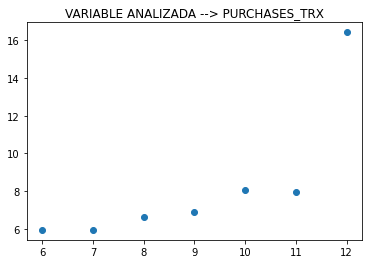

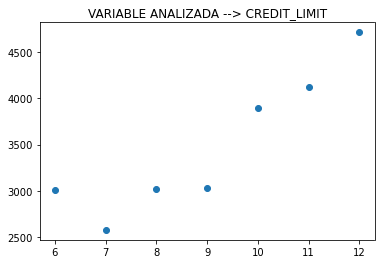

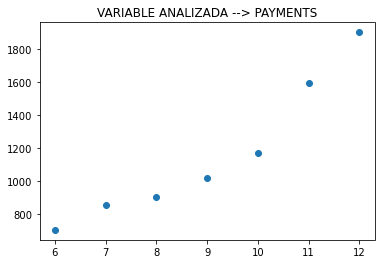

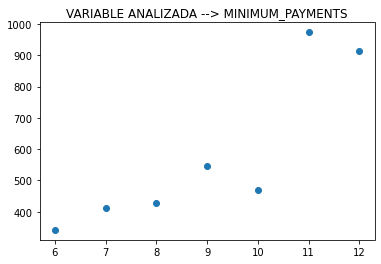

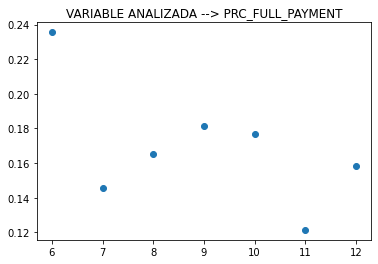

In [15]:
#ANALIZAR COMPORTAMIENTO COMPARATIVO
DATASET_AGRUPADO = DATASET.groupby("TENURE").mean()
COLUMNAS = DATASET_AGRUPADO.columns.tolist()
TENURE_INDEX = list(DATASET_AGRUPADO.index)

for X in COLUMNAS:
    ETIQUETA = "VARIABLE ANALIZADA --> " + str(X)
    plt.title(ETIQUETA)
    plt.scatter(TENURE_INDEX,DATASET_AGRUPADO[X])
    plt.show()

In [16]:
#GENERAR NUEVAS COLUMNAS
import pandas as pd
RUTA = "DATASETS - CERTIFICACIÓN/32_2_CLUSTERING_BANCOS.csv"
DATASET = pd.read_csv(RUTA)
DATASET = DATASET.dropna(how="any", axis = 0)

#COMPRAS MENSUALES PROMEDIO
DATASET["COMP_MENS_PROM"] = DATASET["PURCHASES"]/(DATASET["TENURE"]*DATASET["PURCHASES_FREQUENCY"])

#COMPRAS MENSUALES AL CONTADO PROMEDIO
DATASET["COMP_MENS_CONT_PROM"] = DATASET["ONEOFF_PURCHASES"]/(DATASET["TENURE"]*DATASET["ONEOFF_PURCHASES_FREQUENCY"])

#COMPRAS MENSUALES AL CREDITO PROMEDIO
DATASET["COMP_MENS_CRED_PROM"] = DATASET["INSTALLMENTS_PURCHASES"]/(DATASET["TENURE"]*DATASET["PURCHASES_INSTALLMENTS_FREQUENCY"])

#ADELANTO PROMEDIO PROMEDIO
DATASET["CASH_ADV_PROM"] = DATASET["CASH_ADVANCE"]/(DATASET["TENURE"]*DATASET["CASH_ADVANCE_FREQUENCY"])

#SCORE DEL CLIENTE
DATASET["SCORE"] = DATASET["BALANCE"]/DATASET["CREDIT_LIMIT"]

#COMPORTAMIENTO DE LOS CLIENTES
#PAGO AL CREDITO > 0  Y PAGO AL CONTADO > 0   ---> "AMBOS" 
#PAGO AL CREDITO = 0  Y PAGO AL CONTADO > 0   ---> "CONTADO" 
#PAGO AL CREDITO > 0  Y PAGO AL CONTADO = 0   ---> "CREDITO" 
#PAGO AL CREDITO = 0  Y PAGO AL CONTADO = 0   ---> "NINGUNO" 

import numpy as np
DATASET["AMBOS"] = np.where((DATASET["INSTALLMENTS_PURCHASES"]>0)&(DATASET["ONEOFF_PURCHASES"]>0),1,0)
DATASET["CONTADO"] = np.where((DATASET["INSTALLMENTS_PURCHASES"]==0)&(DATASET["ONEOFF_PURCHASES"]>0),1,0)
DATASET["CREDITO"] = np.where((DATASET["INSTALLMENTS_PURCHASES"]>0)&(DATASET["ONEOFF_PURCHASES"]==0),1,0)
DATASET["NINGUNO"] = np.where((DATASET["INSTALLMENTS_PURCHASES"]==0)&(DATASET["ONEOFF_PURCHASES"]==0),1,0)

DATASET = DATASET.fillna(0)
DATASET

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,TENURE,COMP_MENS_PROM,COMP_MENS_CONT_PROM,COMP_MENS_CRED_PROM,CASH_ADV_PROM,SCORE,AMBOS,CONTADO,CREDITO,NINGUNO
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,12,47.699905,0.000000,95.400382,0.000000,0.040901,0,0,1,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,12,0.000000,0.000000,0.000000,2147.648494,0.457495,0,0,0,1
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,12,64.430833,64.430833,0.000000,0.000000,0.332687,0,1,0,0
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,12,16.000064,16.000064,0.000000,0.000000,0.681429,0,1,0,0
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,...,12,166.659917,0.000000,190.468680,0.000000,1.005460,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,...,6,20.899958,20.899958,0.000000,0.000000,0.011743,0,1,0,0
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,...,6,48.520000,0.000000,58.224023,0.000000,0.028494,0,0,1,0
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,...,6,28.880012,0.000000,36.099982,0.000000,0.023399,0,0,1,0
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,...,6,0.000000,0.000000,0.000000,36.558705,0.026915,0,0,0,1


In [17]:
DATASET.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'COMP_MENS_PROM',
       'COMP_MENS_CONT_PROM', 'COMP_MENS_CRED_PROM', 'CASH_ADV_PROM', 'SCORE',
       'AMBOS', 'CONTADO', 'CREDITO', 'NINGUNO'],
      dtype='object')

## PARTE 32.3: DISTANCIAS ENTRE REGISTROS SIN NORMALIZAR

#### DATASET INVENTADO

In [18]:
#EJEMPLO INVENTADO
LISTA1 = [3,4,5]
LISTA2 = [1000,3500,2600]
LISTA3 = [0.1,0.2,0.3]

DATASET_INVENTADO = pd.DataFrame({
    "C1":LISTA1,
    "C2":LISTA2,
    "C3":LISTA3
})

#GENERACIÓN MATRIZ DE DISTANCIAS
from scipy.spatial import distance_matrix
MATRIZ_DIST = distance_matrix(DATASET_INVENTADO,DATASET_INVENTADO,p=1)
print(MATRIZ_DIST)

#VALIDACIÓN DE DISTANCIAS --> P = 1
#2501.1 ---> DISTANCIA 1 Y 0
DIST_1 = (4-3)+(3500-1000)+(0.2-0.1)
print("p=1 -> {}".format(DIST_1))

#VALIDACIÓN DE DISTANCIAS --> P = 2
#2500.000202 ---> DISTANCIA 1 Y 0
DIST_2 = np.sqrt((4-3)**2+(3500-1000)**2+(0.2-0.1)**2)
print("p=2 -> {}".format(DIST_2))

#GENERAR DATASET
INDICADORES = DATASET_INVENTADO.index
DATASET_DIST = pd.DataFrame(MATRIZ_DIST , columns = INDICADORES , index = INDICADORES )
DATASET_DIST

[[   0.  2501.1 1602.2]
 [2501.1    0.   901.1]
 [1602.2  901.1    0. ]]
p=1 -> 2501.1
p=2 -> 2500.000201999992


,0,1,2
0,0.0,2501.1,1602.2
1,2501.1,0.0,901.1
2,1602.2,901.1,0.0


#### DATASET CREDIT CARD

In [19]:
from scipy.spatial import distance_matrix
COLUMNAS_VALIDAS = DATASET.select_dtypes(include= ["float64","int64","int32"]).columns.tolist()
MATRIZ_DIST = distance_matrix(DATASET[COLUMNAS_VALIDAS],DATASET[COLUMNAS_VALIDAS],p=1)

#GENERAR DATASET
INDICADORES = DATASET["CUST_ID"]
DATASET_DIST = pd.DataFrame(MATRIZ_DIST , columns = INDICADORES , index = INDICADORES )
DATASET_DIST

CUST_ID,C10001,C10002,C10003,C10005,C10006,C10007,C10008,C10009,C10010,C10011,...,C19179,C19180,C19181,C19182,C19183,C19184,C19186,C19188,C19189,C19190
CUST_ID,,,,,,,,,,,,,,,,,,,,,
C10001,0.000000,22929.351599,11599.580184,1896.600347,8732.854624,34471.391266,4717.223291,10028.737574,15009.548961,6077.020089,...,4129.937477,3587.584911,1498.620300,26417.082822,309.950441,1117.719934,668.537044,381.777749,1180.163042,3726.054654
C10002,22929.351599,0.000000,15419.823423,21099.547731,22261.162980,36229.741360,19599.680920,17632.320088,23406.545665,22434.802165,...,19053.649894,23793.353950,23699.847795,10783.556620,23035.547224,23458.704211,23275.324908,23154.414017,23282.171023,24821.864642
C10003,11599.580184,15419.823423,0.000000,10040.579713,11975.550424,27774.294091,7703.407129,3587.446985,9093.645090,11507.009417,...,14029.336038,10515.423339,11335.530483,17962.314442,11718.251578,12247.599438,11543.069263,11757.393500,12395.945495,10789.176520
C10005,1896.600347,21099.547731,10040.579713,0.000000,7510.554850,33582.481608,3354.122944,8683.876454,14880.499275,4817.272885,...,3989.453809,3657.702746,2667.359169,25102.047541,2003.058598,2359.786165,2242.836282,2122.107208,2468.599308,4108.566747
C10006,8732.854624,22261.162980,11975.550424,7510.554850,0.000000,34003.887404,5193.579890,11909.142035,17381.496095,2702.926252,...,9994.971129,9427.544042,7362.877925,26552.524942,8960.921430,9850.574558,8358.923086,8910.602071,9912.987364,9148.135223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19184,1117.719934,23458.704211,12247.599438,2359.786165,9850.574558,35427.107186,5694.142652,11003.223496,15578.553587,7157.292593,...,4454.581585,3907.942093,2490.863299,27429.697164,895.359711,0.000000,1493.818138,940.972487,188.778592,3982.055855
C19186,668.537044,23275.324908,11543.069263,2242.836282,8358.923086,34020.940345,4269.412560,9782.911940,14882.628477,5664.474455,...,4282.623538,3718.874102,997.045161,26266.552091,701.988952,1493.818138,0.000000,619.909660,1569.469471,3803.717128
C19188,381.777749,23154.414017,11757.393500,2122.107208,8910.602071,34572.067950,4753.670165,10150.350925,15094.275856,6216.820106,...,4228.791804,3442.217631,1549.890813,26489.224677,121.715277,940.972487,619.909660,0.000000,1002.892326,3528.727323


## PARTE 32.4: DISTANCIAS ENTRE REGISTROS NORMALIZADOS

#### DATASET INVENTADO

In [20]:
#EJEMPLO INVENTADO
LISTA1 = [3,4,5]
LISTA2 = [1000,3500,2600]
LISTA3 = [0.1,0.2,0.3]

DATASET_INVENTADO = pd.DataFrame({
    "C1":LISTA1,
    "C2":LISTA2,
    "C3":LISTA3
})

#NORMALIZAR DATASET INVENTADO
from sklearn.preprocessing import MinMaxScaler
COLUMNAS = DATASET_INVENTADO.columns.tolist()
ESCALAR = MinMaxScaler()
DATASET_INVENTADO_NORM = ESCALAR.fit_transform(DATASET_INVENTADO)
DATASET_INVENTADO_NORM = pd.DataFrame(DATASET_INVENTADO_NORM,columns = COLUMNAS)

#GENERACIÓN MATRIZ DE DISTANCIAS
from scipy.spatial import distance_matrix
MATRIZ_DIST = distance_matrix(DATASET_INVENTADO_NORM,DATASET_INVENTADO_NORM,p=1)

#GENERAR DATASET
INDICADORES = DATASET_INVENTADO_NORM.index
DATASET_DIST = pd.DataFrame(MATRIZ_DIST , columns = INDICADORES , index = INDICADORES )
DATASET_DIST

,0,1,2
0,0.00,2.00,2.64
1,2.00,0.00,1.36
2,2.64,1.36,0.00


#### DATASET CREDIT CARD

In [21]:
#NORMALIZAR DATASET CREDIT CARD
from sklearn.preprocessing import MinMaxScaler
COLUMNAS = DATASET.select_dtypes(include= ["float64","int64","int32"]).columns.tolist()
ESCALAR = MinMaxScaler()
DATASET_NORM = ESCALAR.fit_transform(DATASET[COLUMNAS])
DATASET_NORM = pd.DataFrame(DATASET_NORM,columns = COLUMNAS)

#GENERACIÓN MATRIZ DE DISTANCIAS
from scipy.spatial import distance_matrix
MATRIZ_DIST = distance_matrix(DATASET_NORM,DATASET_NORM,p=1)

#GENERAR DATASET
INDICADORES = DATASET["CUST_ID"]
DATASET_DIST = pd.DataFrame(MATRIZ_DIST , columns = INDICADORES , index = INDICADORES )
DATASET_DIST

CUST_ID,C10001,C10002,C10003,C10005,C10006,C10007,C10008,C10009,C10010,C10011,...,C19179,C19180,C19181,C19182,C19183,C19184,C19186,C19188,C19189,C19190
CUST_ID,,,,,,,,,,,,,,,,,,,,,
C10001,0.000000,3.557723,4.566622,2.559896,1.540789,7.127729,2.191364,3.010230,3.099060,2.201023,...,4.235831,4.123046,3.834297,3.806208,3.045117,3.622224,3.300092,2.543405,3.701118,4.872318
C10002,3.557723,0.000000,5.012509,3.378813,4.553455,7.428747,5.190397,3.837225,4.000878,5.314541,...,2.232339,4.871549,6.734214,5.525043,5.946952,4.959773,6.214814,5.603273,1.958268,5.762555
C10003,4.566622,5.012509,0.000000,2.235343,4.373662,4.997940,4.301515,4.071969,2.575198,4.433245,...,6.559854,2.931395,6.292775,6.216424,5.535160,3.644253,5.789162,5.708721,6.031864,2.678391
C10005,2.559896,3.378813,2.235343,0.000000,3.540044,7.044880,4.169254,2.896737,1.238527,4.194306,...,4.368351,1.789996,5.999013,6.126718,5.211751,1.790929,5.479613,5.049890,3.842579,2.973517
C10006,1.540789,4.553455,4.373662,3.540044,0.000000,5.977166,0.927977,3.244399,4.456283,0.877153,...,5.709009,4.755673,2.874643,2.918020,2.197605,5.163012,2.424455,2.030778,5.211605,5.230270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19184,3.622224,4.959773,3.644253,1.790929,5.163012,8.398803,5.792223,4.450939,1.626809,5.817275,...,2.999004,1.194833,5.455036,5.414043,4.632524,0.000000,4.905223,4.132234,3.057302,1.640112
C19186,3.300092,6.214814,5.789162,5.479613,2.424455,5.832872,1.896689,5.231752,6.366076,1.912052,...,4.850146,4.705401,0.549812,2.527049,0.276975,4.905223,0.000000,0.773867,4.453996,5.128701
C19188,2.543405,5.603273,5.708721,5.049890,2.030778,6.605587,2.159989,4.824389,5.612740,2.185041,...,4.254633,4.276405,1.322802,1.781809,0.510392,4.132234,0.773867,0.000000,3.681269,4.371958


## PARTE 32.5: GENERACIÓN DE DENDROGRAMA
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

#### DENDROGRAMA SIMPLE

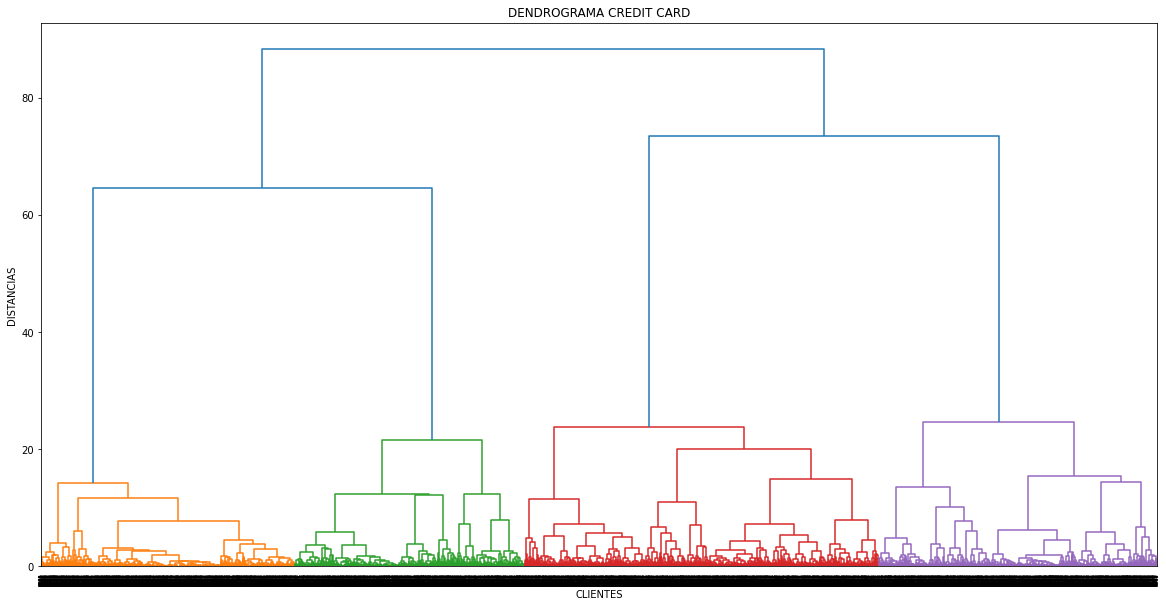

In [22]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

LINK = linkage(DATASET_NORM, method = "ward")
plt.figure(figsize=(20,10))
plt.title("DENDROGRAMA CREDIT CARD")
plt.xlabel("CLIENTES")
plt.ylabel("DISTANCIAS")
dendrogram(LINK)
plt.show()

#### DENDROGRAMA CON LÍMITES

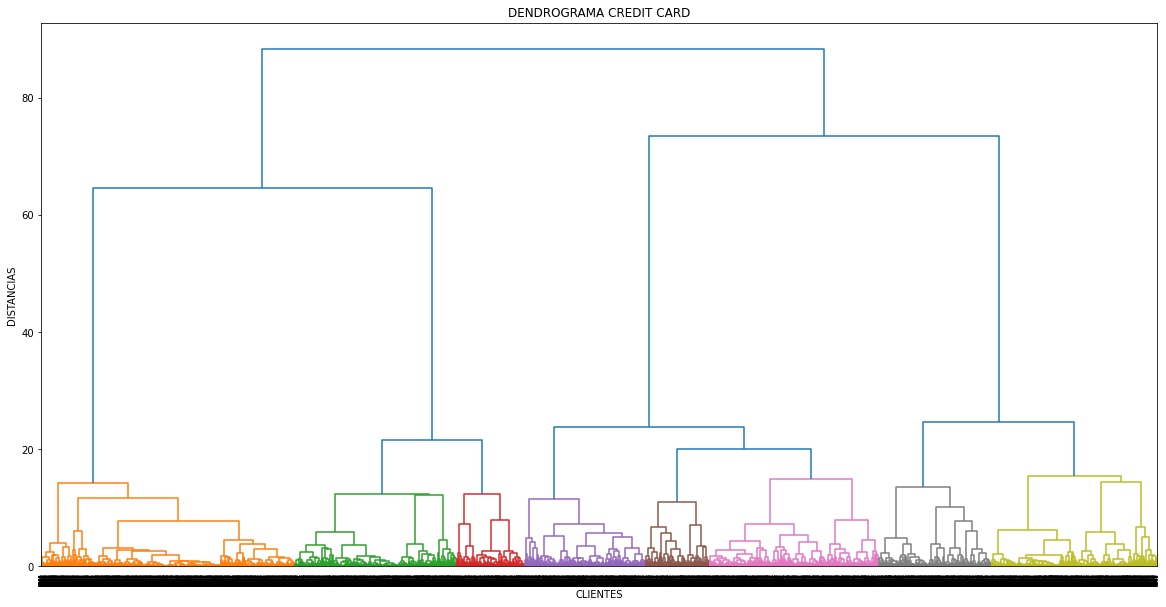

In [23]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

LINK = linkage(DATASET_NORM, method = "ward")
plt.figure(figsize=(20,10))
plt.title("DENDROGRAMA CREDIT CARD")
plt.xlabel("CLIENTES")
plt.ylabel("DISTANCIAS")
dendrogram(LINK, color_threshold = 18)
plt.show()

#### DENDROGRAMA TRUNCADO

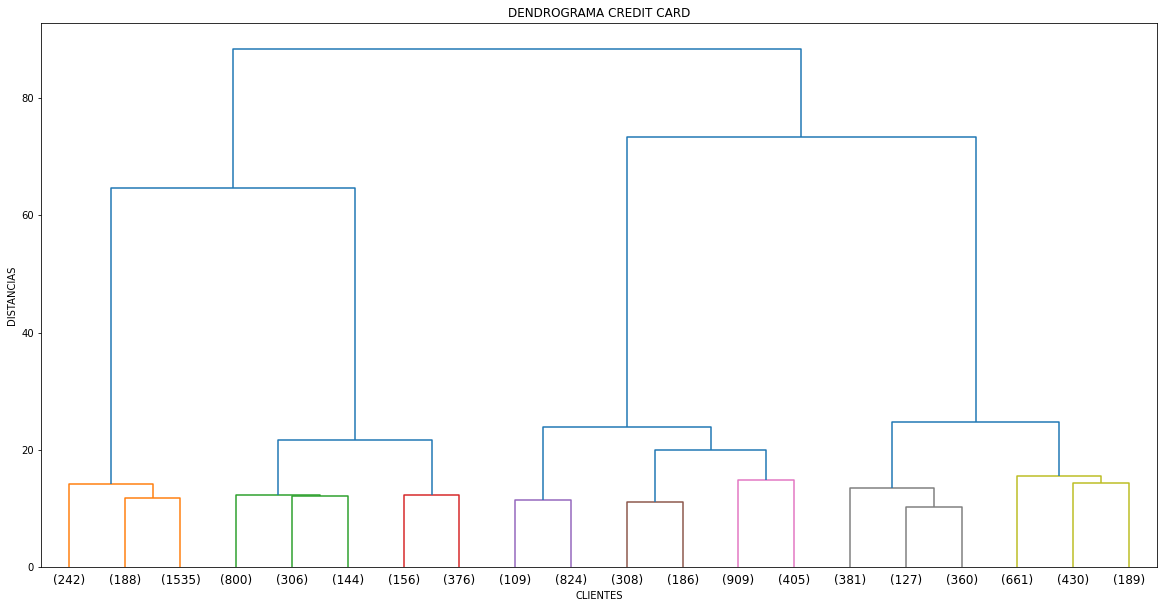

In [24]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

LINK = linkage(DATASET_NORM, method = "ward")
plt.figure(figsize=(20,10))
plt.title("DENDROGRAMA CREDIT CARD")
plt.xlabel("CLIENTES")
plt.ylabel("DISTANCIAS")
dendrogram(LINK, color_threshold = 18, truncate_mode="lastp",p=20)
plt.show()

#### DENDROGRAMA MEJORADO

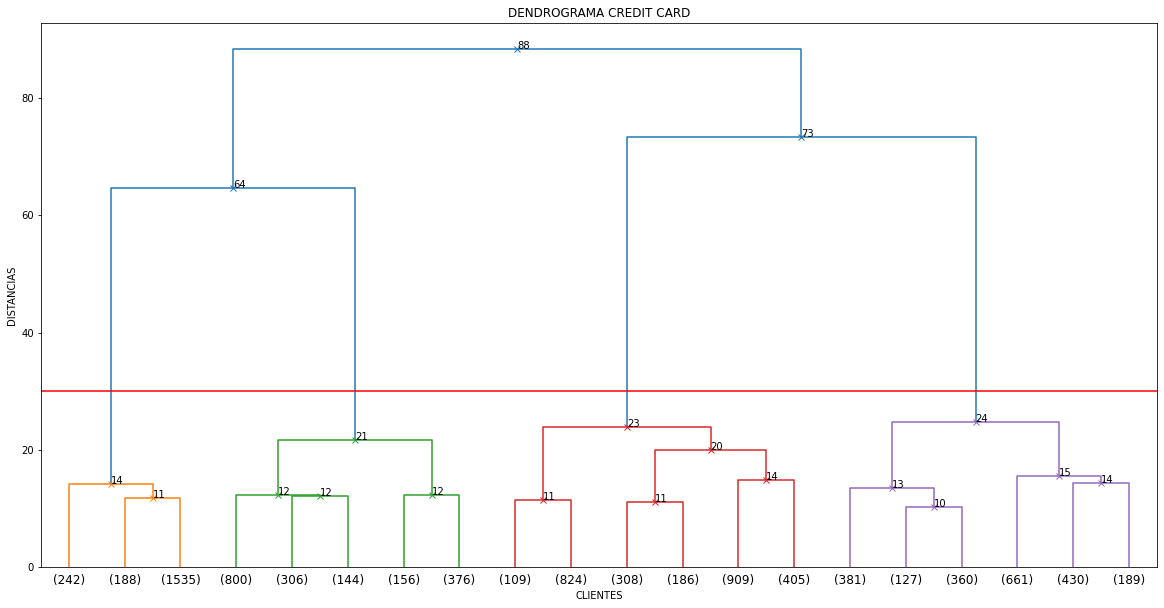

In [25]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

ALTURA_LIMITE = 30

LINK = linkage(DATASET_NORM, method = "ward")
plt.figure(figsize=(20,10))
plt.title("DENDROGRAMA CREDIT CARD")
plt.xlabel("CLIENTES")
plt.ylabel("DISTANCIAS")
PARAMETROS = dendrogram(LINK, color_threshold = ALTURA_LIMITE, truncate_mode="lastp",p=20)

POSX = list(PARAMETROS["icoord"])
POSY = list(PARAMETROS["dcoord"])
COLOR = list(PARAMETROS["color_list"])

plt.axhline(y=ALTURA_LIMITE , c = "r")

for M in range(len(POSX)):
    CX = (POSX[M][1]+POSX[M][2])/2
    CY = POSY[M][1]
    plt.plot(CX,CY,"x",c=COLOR[M])
    plt.annotate(int(CY), (CX,CY))
plt.show()

## PARTE 32.6: GENERACIÓN DE PUNTOS

In [26]:
def GENERAR_CIRCULO(X , Y , RADIO , CANTIDAD):
    import math
    import pandas as pd
    import numpy.random as rnd
    
    ANGULO = list(rnd.uniform(0, 2 * math.pi, CANTIDAD))
    DISTANCIA = list(rnd.uniform(0, RADIO, CANTIDAD))
    
    LISTA_X = []
    LISTA_Y = []
    
    for VAL in range(CANTIDAD):
        LISTA_X.append(DISTANCIA[VAL] * math.cos(ANGULO[VAL]) + X)
        LISTA_Y.append(DISTANCIA[VAL] * math.sin(ANGULO[VAL]) + Y)
    
    DATASET = pd.DataFrame({
        "CX":LISTA_X,
        "CY":LISTA_Y,
    })
    
    return DATASET

In [27]:
def GENERAR_ANILLO(X , Y , R_INT , R_EXT , CANTIDAD):
    import math
    import pandas as pd
    import numpy.random as rnd
    
    ANGULO = list(rnd.uniform(0, 2 * math.pi, CANTIDAD))
    DISTANCIA = list(rnd.uniform(R_INT, R_EXT, CANTIDAD))
    
    LISTA_X = []
    LISTA_Y = []
    
    for VAL in range(CANTIDAD):
        LISTA_X.append(DISTANCIA[VAL] * math.cos(ANGULO[VAL]) + X)
        LISTA_Y.append(DISTANCIA[VAL] * math.sin(ANGULO[VAL]) + Y)
    
    DATASET = pd.DataFrame({
        "CX":LISTA_X,
        "CY":LISTA_Y,
    })
    
    return DATASET

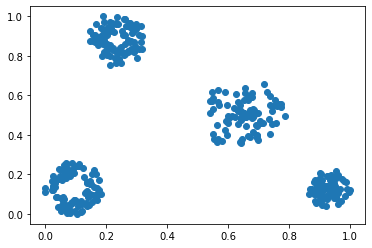

In [28]:
#GENERACIÓN DE PUNTOS
C1 = GENERAR_CIRCULO(100 , 0 , 5 , 100) 
C2 = GENERAR_CIRCULO(80 , 20 , 10 , 100)
C3 = GENERAR_ANILLO(50 , 40 , 2 , 7 , 100)
C4 = GENERAR_ANILLO(40 , 0 , 3 , 7 , 100)

DATASET_TOTAL = pd.concat([C1,C2,C3,C4],axis = 0)

#NORMALIZAR DATASET
from sklearn.preprocessing import MinMaxScaler
COLUMNAS = DATASET_TOTAL.columns.tolist()
ESCALAR = MinMaxScaler()
DATASET_TOTAL_N = ESCALAR.fit_transform(DATASET_TOTAL)
DATASET_TOTAL_N = pd.DataFrame(DATASET_TOTAL_N,columns = COLUMNAS)

plt.scatter(DATASET_TOTAL_N["CX"], DATASET_TOTAL_N["CY"])

## PARTE 32.7: CÁLCULO DE NÚMERO ÓPTIMO DE CLUSTERS

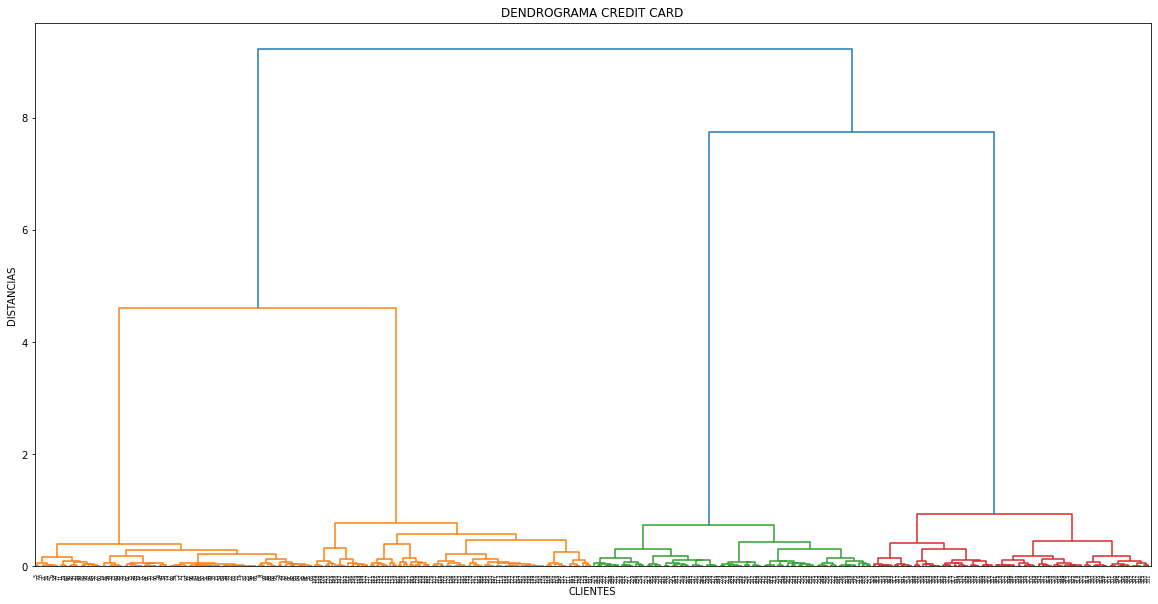

In [29]:
#GENERACIÓN DE DENDROGRAMA
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

LINK = linkage(DATASET_TOTAL_N, method = "ward")
plt.figure(figsize=(20,10))
plt.title("DENDROGRAMA CREDIT CARD")
plt.xlabel("CLIENTES")
plt.ylabel("DISTANCIAS")
dendrogram(LINK)
plt.show()

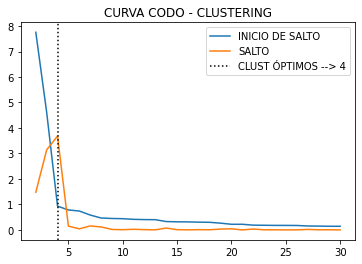

In [30]:
#IMPLEMENTANDO MÉTODO DEL CODO
#ÚLTIMOS 30 SALTOS REALIZADOS
SALTO_GRUPO = LINK[-30:,2]

#REVIRTIENDO LA LISTA OBTENIDA MEDIANTE SLICING
SALTO_GRUPO_REV = SALTO_GRUPO[::-1]

#CÁLCULO DE SALTOS
ALTURA_INICIAL = []
ALTURA_FINAL = []
LONGITUD_SALTO = []
NUM_CLUSTER = []
INDICE = []

for VAR in range(len(SALTO_GRUPO)-1):
    ALTURA_FINAL.append(SALTO_GRUPO_REV[VAR])
    ALTURA_INICIAL.append(SALTO_GRUPO_REV[VAR+1])
    LONGITUD_SALTO.append(abs(SALTO_GRUPO_REV[VAR+1]-SALTO_GRUPO_REV[VAR]))
    NUM_CLUSTER.append(VAR+2)
    INDICE.append(VAR+1)

DATASET_SALTOS = pd.DataFrame({
    "INDICE":INDICE,
    "INICIAL":ALTURA_INICIAL,
    "FINAL":ALTURA_FINAL,
    "SALTO":LONGITUD_SALTO,
    "CLUSTERS":NUM_CLUSTER
})

#GRÁFICO DE LA CURVA CODO
import numpy as np
NUM_CLUSTER = int(DATASET_SALTOS[DATASET_SALTOS["SALTO"] == np.max(DATASET_SALTOS["SALTO"])]["CLUSTERS"])
ETIQUETA = "CLUST ÓPTIMOS --> " + str(NUM_CLUSTER)

plt.plot(DATASET_SALTOS["CLUSTERS"],DATASET_SALTOS["INICIAL"], label = "INICIO DE SALTO")
plt.plot(DATASET_SALTOS["CLUSTERS"],DATASET_SALTOS["SALTO"], label = "SALTO")
plt.axvline( x = NUM_CLUSTER , color = "k" , linestyle = ":" , label = ETIQUETA)
plt.title("CURVA CODO - CLUSTERING")
plt.legend()
plt.show()

## PARTE 32.8: MÉTODO CLUSTERING 1 --> AGLOMERATIVO

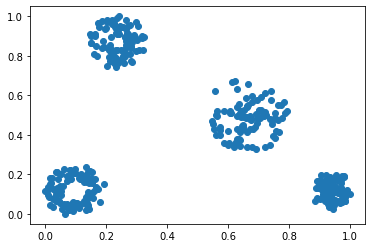

In [31]:
#GENERACIÓN DE PUNTOS
C1 = GENERAR_CIRCULO(100 , 0 , 5 , 100) 
C2 = GENERAR_CIRCULO(80 , 20 , 10 , 100)
C3 = GENERAR_ANILLO(50 , 40 , 2 , 7 , 100)
C4 = GENERAR_ANILLO(40 , 0 , 3 , 7 , 100)

DATASET_TOTAL = pd.concat([C1,C2,C3,C4],axis = 0)

#NORMALIZAR DATASET
from sklearn.preprocessing import MinMaxScaler
COLUMNAS = DATASET_TOTAL.columns.tolist()
ESCALAR = MinMaxScaler()
DATASET_TOTAL_N = ESCALAR.fit_transform(DATASET_TOTAL)
DATASET_TOTAL_N = pd.DataFrame(DATASET_TOTAL_N,columns = COLUMNAS)

plt.scatter(DATASET_TOTAL_N["CX"], DATASET_TOTAL_N["CY"])
plt.show()

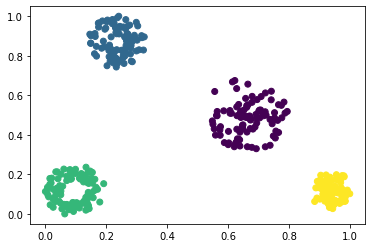

In [32]:
#CLUSTERING --> MÉTODO AGLOMERATIVO
from sklearn.cluster import AgglomerativeClustering
CLUSTERS_AGLOMERATIVO = AgglomerativeClustering(n_clusters=4, linkage="ward").fit(DATASET_TOTAL_N)

#VERIFICANDO CLUSTERING
plt.scatter(DATASET_TOTAL_N["CX"], DATASET_TOTAL_N["CY"] , c = CLUSTERS_AGLOMERATIVO.labels_)
plt.show()

## PARTE 32.9: MÉTODO CLUSTERING 2 --> KMEANS

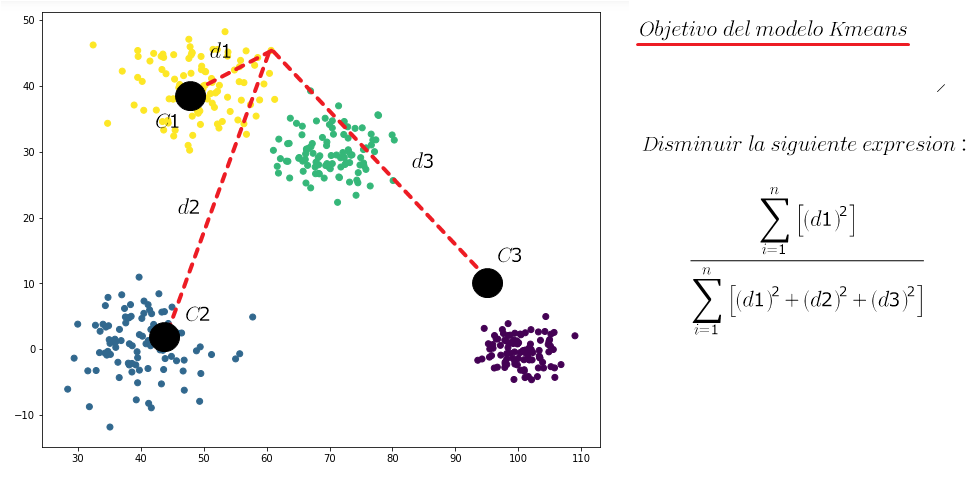

In [33]:
from IPython.display import Image
Image(filename="RECURSOS - CERTIFICACIÓN/OBJETIVO KMEANS.png")

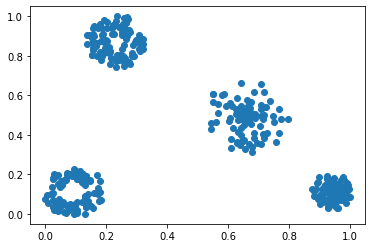

In [34]:
#GENERACIÓN DE PUNTOS
C1 = GENERAR_CIRCULO(100 , 0 , 5 , 100) 
C2 = GENERAR_CIRCULO(80 , 20 , 10 , 100)
C3 = GENERAR_ANILLO(50 , 40 , 2 , 7 , 100)
C4 = GENERAR_ANILLO(40 , 0 , 3 , 7 , 100)

DATASET_TOTAL = pd.concat([C1,C2,C3,C4],axis = 0)

#NORMALIZAR DATASET
from sklearn.preprocessing import MinMaxScaler
COLUMNAS = DATASET_TOTAL.columns.tolist()
ESCALAR = MinMaxScaler()
DATASET_TOTAL_N = ESCALAR.fit_transform(DATASET_TOTAL)
DATASET_TOTAL_N = pd.DataFrame(DATASET_TOTAL_N,columns = COLUMNAS)

plt.scatter(DATASET_TOTAL_N["CX"], DATASET_TOTAL_N["CY"])
plt.show()

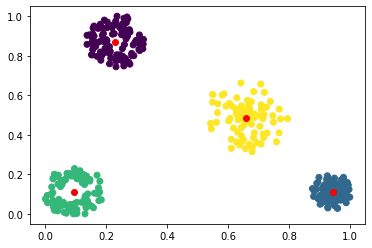

In [35]:
from sklearn.cluster import KMeans
CLUSTERS_KMEANS = KMeans(n_clusters = 4, random_state=0).fit(DATASET_TOTAL_N)

#VERIFICANDO CLUSTERING
plt.scatter(DATASET_TOTAL_N["CX"], DATASET_TOTAL_N["CY"] , c = CLUSTERS_KMEANS.labels_)
plt.scatter(CLUSTERS_KMEANS.cluster_centers_[:,0] , CLUSTERS_KMEANS.cluster_centers_[:,1] , c = "red")
plt.show()

## PARTE 32.10: MÉTODO CLUSTERING 3 --> KMEDOIDES

COMANDO PARA INSTALAR EN ANACONDA PROMPT:
* pip3 install scikit-learn-extra

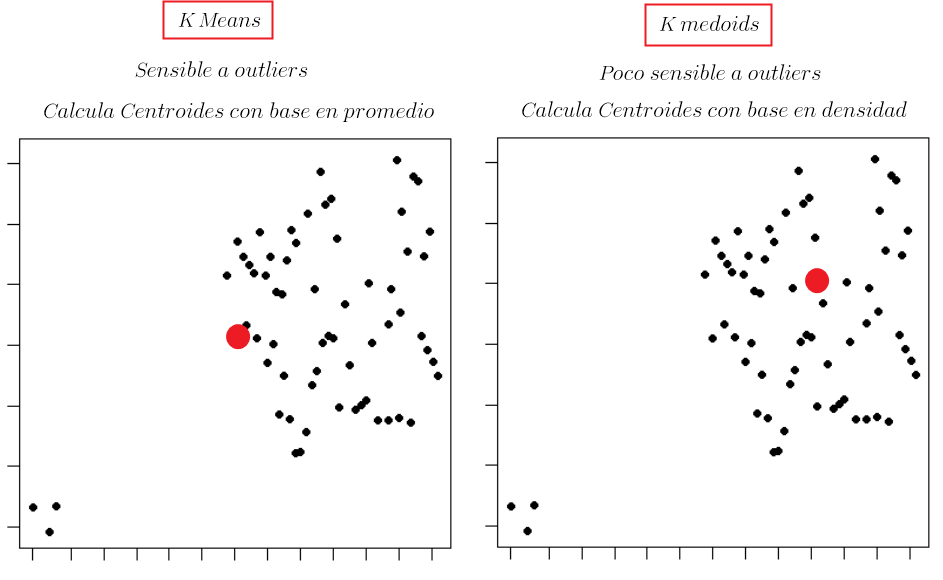

In [36]:
from IPython.display import Image
Image(filename="RECURSOS - CERTIFICACIÓN/KMEDOIDS.png")

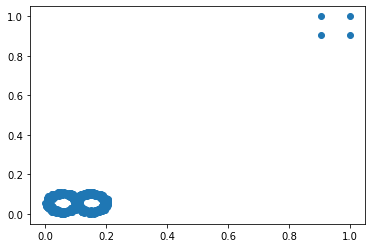

In [37]:
#GENERACIÓN DE PUNTOS
C1 = GENERAR_ANILLO(50 , 50 , 20 , 30 , 300)
C2 = GENERAR_ANILLO(100 , 50 , 20 , 30 , 300)

#PUNTOS ADICIONALES
LISTA_X = [500,550,550,500]
LISTA_Y = [500,550,500,550]
C3 = pd.DataFrame({
    "CX":LISTA_X,
    "CY":LISTA_Y,
})
DATASET_TOTAL = pd.concat([C1,C2,C3],axis = 0)

#NORMALIZAR DATASET
from sklearn.preprocessing import MinMaxScaler
COLUMNAS = DATASET_TOTAL.columns.tolist()
ESCALAR = MinMaxScaler()
DATASET_TOTAL_N = ESCALAR.fit_transform(DATASET_TOTAL)
DATASET_TOTAL_N = pd.DataFrame(DATASET_TOTAL_N,columns = COLUMNAS)

plt.scatter(DATASET_TOTAL_N["CX"], DATASET_TOTAL_N["CY"])
plt.show()

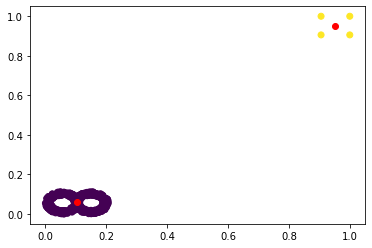

In [38]:
#APLICANDO ALGORITMO KMEANS
from sklearn.cluster import KMeans
CLUSTERS_KMEANS = KMeans(n_clusters = 2, random_state=0).fit(DATASET_TOTAL_N)

#VERIFICANDO CLUSTERING
plt.scatter(DATASET_TOTAL_N["CX"], DATASET_TOTAL_N["CY"] , c = CLUSTERS_KMEANS.labels_)
plt.scatter(CLUSTERS_KMEANS.cluster_centers_[:,0] , CLUSTERS_KMEANS.cluster_centers_[:,1] , c = "red")
plt.show()

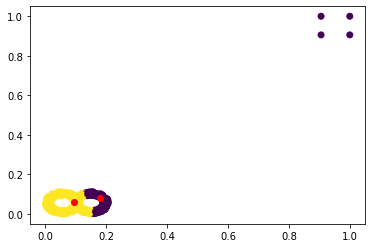

In [39]:
#APLICANDO ALGORITMO KMEDOIDES
from sklearn_extra.cluster import KMedoids
CLUSTERS_KMEDOIDES = KMedoids(n_clusters=2, random_state=0).fit(DATASET_TOTAL_N)

#VERIFICANDO CLUSTERING
plt.scatter(DATASET_TOTAL_N["CX"], DATASET_TOTAL_N["CY"] , c = CLUSTERS_KMEDOIDES.labels_)
plt.scatter(CLUSTERS_KMEDOIDES.cluster_centers_[:,0] , CLUSTERS_KMEDOIDES.cluster_centers_[:,1] , c = "red")
plt.show()

## PARTE 32.11: MÉTODO CLUSTERING 4 --> ESPECTRAL
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

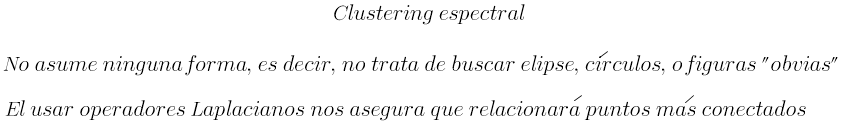

In [40]:
from IPython.display import Image
Image(filename="RECURSOS - CERTIFICACIÓN/CLUSTERING ESPECTRAL.png")

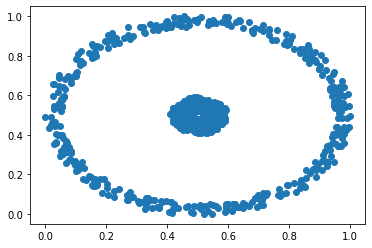

In [41]:
#GENERACIÓN DE PUNTOS
C1 = GENERAR_ANILLO(70 , 70 , 1 , 5 , 400)
C2 = GENERAR_ANILLO(70 , 70 , 24 , 27 , 400)

DATASET_TOTAL = pd.concat([C1,C2],axis = 0)

#NORMALIZAR DATASET
from sklearn.preprocessing import MinMaxScaler
COLUMNAS = DATASET_TOTAL.columns.tolist()
ESCALAR = MinMaxScaler()
DATASET_TOTAL_N = ESCALAR.fit_transform(DATASET_TOTAL)
DATASET_TOTAL_N = pd.DataFrame(DATASET_TOTAL_N,columns = COLUMNAS)

plt.scatter(DATASET_TOTAL_N["CX"], DATASET_TOTAL_N["CY"])
plt.show()

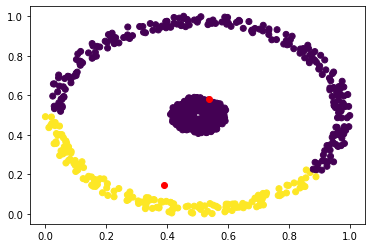

In [42]:
#APLICANDO ALGORITMO KMEANS
from sklearn.cluster import KMeans
CLUSTERS_KMEANS = KMeans(n_clusters = 2, random_state=0).fit(DATASET_TOTAL_N)

#VERIFICANDO CLUSTERING
plt.scatter(DATASET_TOTAL_N["CX"], DATASET_TOTAL_N["CY"] , c = CLUSTERS_KMEANS.labels_)
plt.scatter(CLUSTERS_KMEANS.cluster_centers_[:,0] , CLUSTERS_KMEANS.cluster_centers_[:,1] , c = "red")
plt.show()

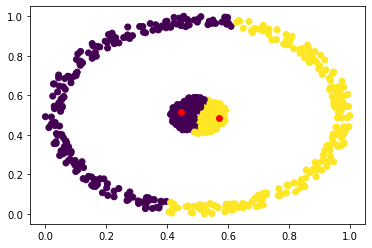

In [43]:
#APLICANDO ALGORITMO KMEDOIDES
from sklearn_extra.cluster import KMedoids
CLUSTERS_KMEDOIDES = KMedoids(n_clusters=2, random_state=0).fit(DATASET_TOTAL_N)

#VERIFICANDO CLUSTERING
plt.scatter(DATASET_TOTAL_N["CX"] , DATASET_TOTAL_N["CY"] , c = CLUSTERS_KMEDOIDES.labels_)
plt.scatter(CLUSTERS_KMEDOIDES.cluster_centers_[:,0] , CLUSTERS_KMEDOIDES.cluster_centers_[:,1] , c = "red")
plt.show()

C:\Users\BENJAMIN\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


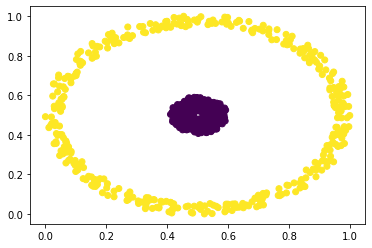

In [44]:
#APLICANDO ALGORITMO CLUSTERING ESPECTRAL
from sklearn.cluster import SpectralClustering

CLUSTERS_ESPECTRAL = SpectralClustering(n_clusters=2 , affinity = 'nearest_neighbors' , random_state = 0).fit(DATASET_TOTAL_N)
plt.scatter(DATASET_TOTAL_N["CX"], DATASET_TOTAL_N["CY"] , c = CLUSTERS_ESPECTRAL.labels_)
plt.show()

## PARTE 32.12: CLUSTERING SOBRE DATASET CREDIT CARD

* PASO 1: ANALIZAR EL DATASET
* PASO 2: ELIMINAR / RELLENAR LOS REGISTROS VACÍOS
* PASO 3: GENERAR NUEVAS COLUMNAS
* PASO 4: NORMALIZAR EL DATASET
* PASO 5: ANALIZAR EL DENDROGRAMA 
* PASO 6: APLICAR EL MÉTODO DEL CODO
* PASO 7: CLUSTERIZAR MEDIANTE ALGÚN MÉTODO, CON EL NÚMERO ÓPTIMO DE CLUSTERS
* PASO 8: IDENTIFICAR LOS REGISTROS CON EL ID CLUSTER SOBRE EL DATASET ORIGINAL
* PASO 9: ANALIZAR EL COMPORTAMIENTO DE LAS VARIABLES PARA EXPLICAR EL CLUSTER

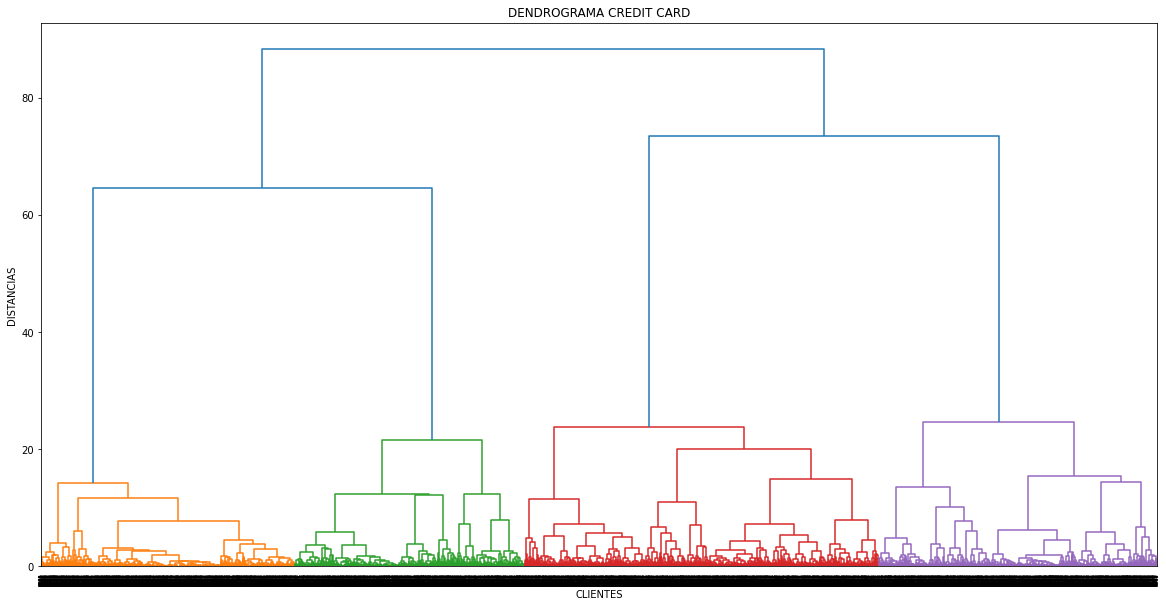

In [45]:
#----------------------------------------------------------------------------------------------
#PASO 1 --> ANALIZAR EL DATASET
import pandas as pd
RUTA = "DATASETS - CERTIFICACIÓN/32_2_CLUSTERING_BANCOS.csv"
DATASET = pd.read_csv(RUTA)
DATASET = DATASET.drop(["CUST_ID"],axis = 1)

#----------------------------------------------------------------------------------------------
#PASO 2 --> ELIMINAR / RELLENAR LOS REGISTROS VACÍOS
DATASET = DATASET.dropna(how="any", axis = 0)

#----------------------------------------------------------------------------------------------
#PASO 3 --> GENERAR NUEVAS COLUMNAS
#COMPRAS MENSUALES PROMEDIO
DATASET["COMP_MENS_PROM"] = DATASET["PURCHASES"]/(DATASET["TENURE"]*DATASET["PURCHASES_FREQUENCY"])

#COMPRAS MENSUALES AL CONTADO PROMEDIO
DATASET["COMP_MENS_CONT_PROM"] = DATASET["ONEOFF_PURCHASES"]/(DATASET["TENURE"]*DATASET["ONEOFF_PURCHASES_FREQUENCY"])

#COMPRAS MENSUALES AL CREDITO PROMEDIO
DATASET["COMP_MENS_CRED_PROM"] = DATASET["INSTALLMENTS_PURCHASES"]/(DATASET["TENURE"]*DATASET["PURCHASES_INSTALLMENTS_FREQUENCY"])

#ADELANTO PROMEDIO PROMEDIO
DATASET["CASH_ADV_PROM"] = DATASET["CASH_ADVANCE"]/(DATASET["TENURE"]*DATASET["CASH_ADVANCE_FREQUENCY"])

#SCORE DEL CLIENTE
DATASET["SCORE"] = DATASET["BALANCE"]/DATASET["CREDIT_LIMIT"]

#COMPORTAMIENTO DE LOS CLIENTES
#PAGO AL CREDITO > 0  Y PAGO AL CONTADO > 0   ---> "AMBOS" 
#PAGO AL CREDITO = 0  Y PAGO AL CONTADO > 0   ---> "CONTADO" 
#PAGO AL CREDITO > 0  Y PAGO AL CONTADO = 0   ---> "CREDITO" 
#PAGO AL CREDITO = 0  Y PAGO AL CONTADO = 0   ---> "NINGUNO" 

import numpy as np
DATASET["AMBOS"] = np.where((DATASET["INSTALLMENTS_PURCHASES"]>0)&(DATASET["ONEOFF_PURCHASES"]>0),1,0)
DATASET["CONTADO"] = np.where((DATASET["INSTALLMENTS_PURCHASES"]==0)&(DATASET["ONEOFF_PURCHASES"]>0),1,0)
DATASET["CREDITO"] = np.where((DATASET["INSTALLMENTS_PURCHASES"]>0)&(DATASET["ONEOFF_PURCHASES"]==0),1,0)
DATASET["NINGUNO"] = np.where((DATASET["INSTALLMENTS_PURCHASES"]==0)&(DATASET["ONEOFF_PURCHASES"]==0),1,0)

DATASET = DATASET.fillna(0)

#----------------------------------------------------------------------------------------------
#PASO 4 --> NORMALIZAR EL DATASET
#NORMALIZAR DATASET
from sklearn.preprocessing import MinMaxScaler
COLUMNAS = DATASET.columns.tolist()
ESCALAR = MinMaxScaler()
DATASET_N = ESCALAR.fit_transform(DATASET)
DATASET_N = pd.DataFrame(DATASET_N,columns = COLUMNAS)

#----------------------------------------------------------------------------------------------
#PASO 5 --> ANALIZAR EL DENDROGRAMA
#GENERACIÓN DE DENDROGRAMA
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

LINK = linkage(DATASET_N, method = "ward")
plt.figure(figsize=(20,10))
plt.title("DENDROGRAMA CREDIT CARD")
plt.xlabel("CLIENTES")
plt.ylabel("DISTANCIAS")
dendrogram(LINK)
plt.show()

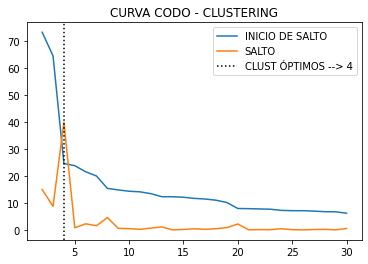

In [46]:
#----------------------------------------------------------------------------------------------
#PASO 6 --> APLICAR EL MÉTODO DEL CODO
#IMPLEMENTANDO MÉTODO DEL CODO
SALTO_GRUPO = LINK[-30:,2]
SALTO_GRUPO_REV = SALTO_GRUPO[::-1]

#CÁLCULO DE SALTOS
ALTURA_INICIAL = []
ALTURA_FINAL = []
LONGITUD_SALTO = []
NUM_CLUSTER = []
INDICE = []

for VAR in range(len(SALTO_GRUPO)-1):
    ALTURA_FINAL.append(SALTO_GRUPO_REV[VAR])
    ALTURA_INICIAL.append(SALTO_GRUPO_REV[VAR+1])
    LONGITUD_SALTO.append(abs(SALTO_GRUPO_REV[VAR+1]-SALTO_GRUPO_REV[VAR]))
    NUM_CLUSTER.append(VAR+2)
    INDICE.append(VAR+1)

DATASET_SALTOS = pd.DataFrame({
    "INDICE":INDICE,
    "INICIAL":ALTURA_INICIAL,
    "FINAL":ALTURA_FINAL,
    "SALTO":LONGITUD_SALTO,
    "CLUSTERS":NUM_CLUSTER
})

#GRÁFICO DE LA CURVA CODO
import numpy as np
NUM_CLUSTER = int(DATASET_SALTOS[DATASET_SALTOS["SALTO"] == np.max(DATASET_SALTOS["SALTO"])]["CLUSTERS"])
ETIQUETA = "CLUST ÓPTIMOS --> " + str(NUM_CLUSTER)

plt.plot(DATASET_SALTOS["CLUSTERS"],DATASET_SALTOS["INICIAL"], label = "INICIO DE SALTO")
plt.plot(DATASET_SALTOS["CLUSTERS"],DATASET_SALTOS["SALTO"], label = "SALTO")
plt.axvline( x = NUM_CLUSTER , color = "k" , linestyle = ":" , label = ETIQUETA)
plt.title("CURVA CODO - CLUSTERING")
plt.legend()
plt.show()

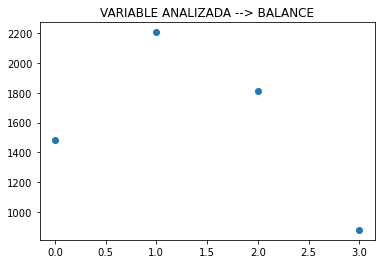

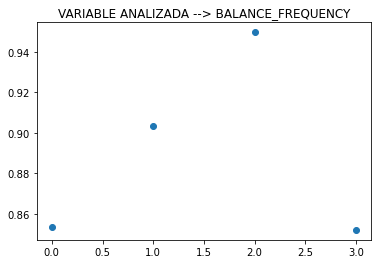

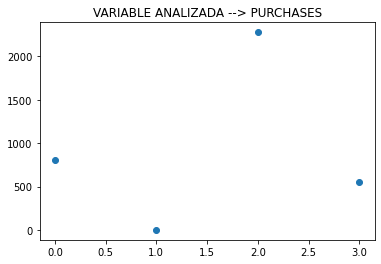

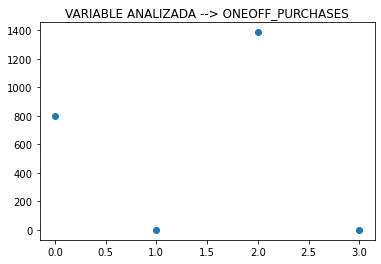

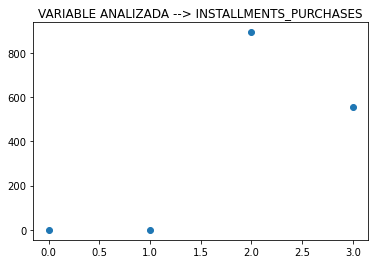

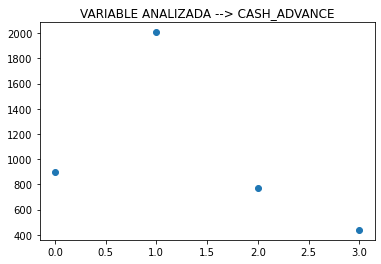

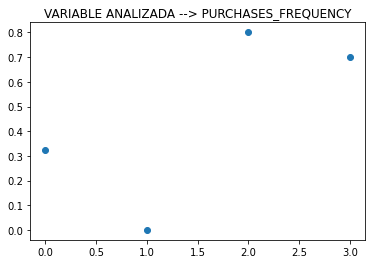

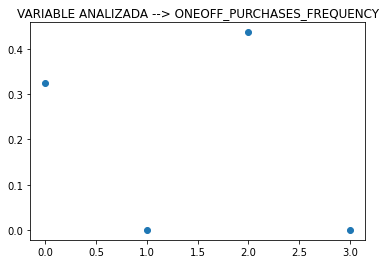

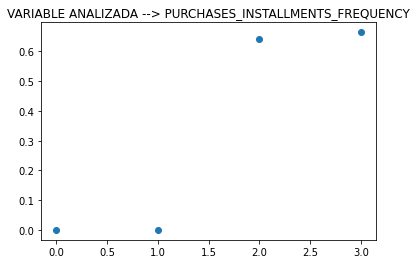

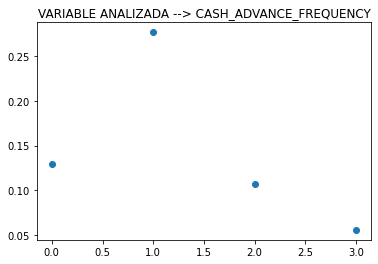

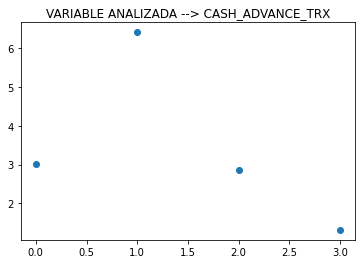

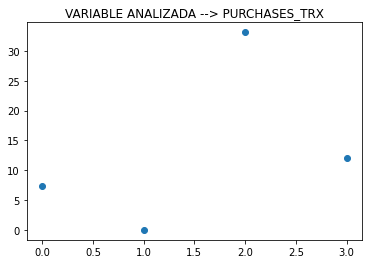

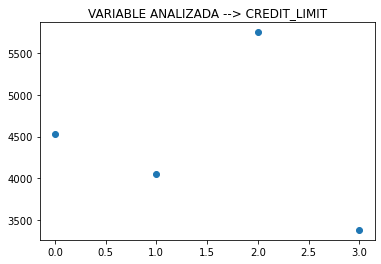

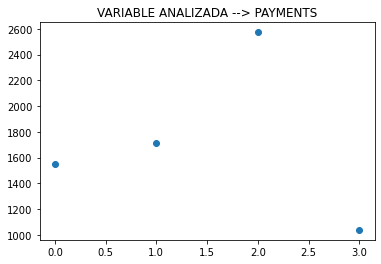

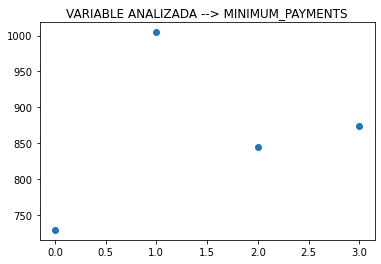

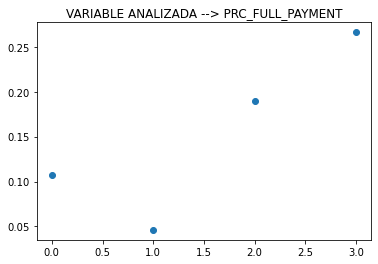

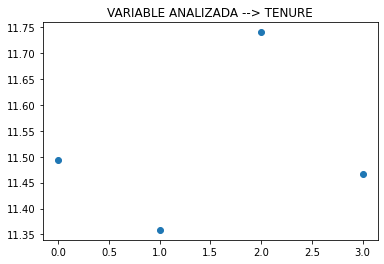

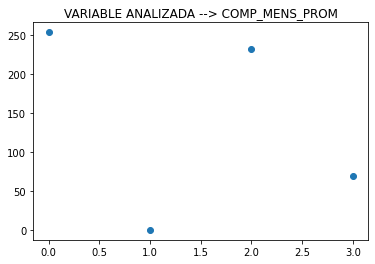

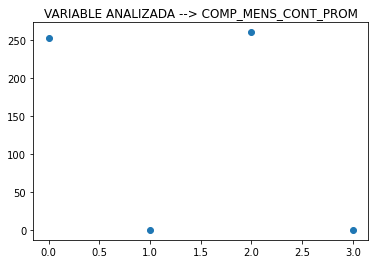

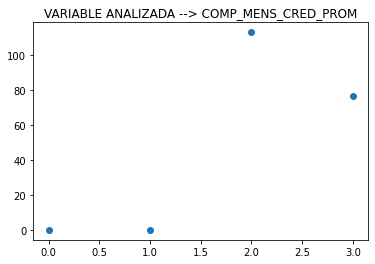

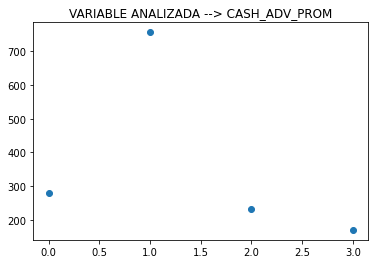

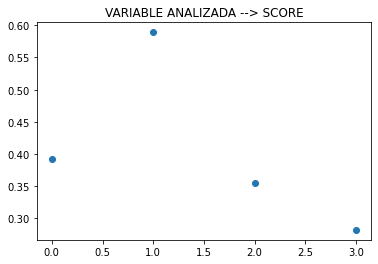

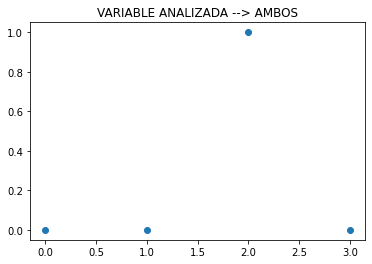

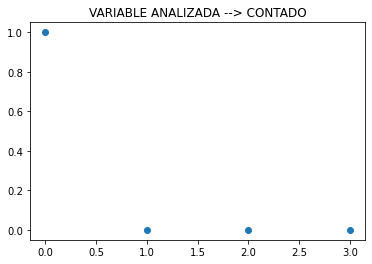

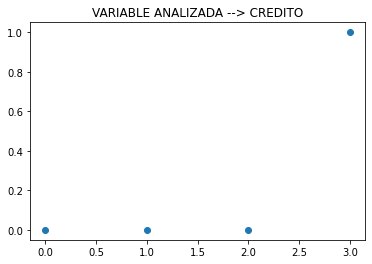

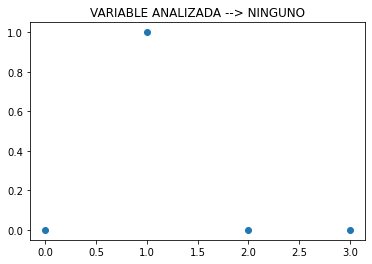

In [47]:
#----------------------------------------------------------------------------------------------
#PASO 7 --> CLUSTERIZAR MEDIANTE ALGÚN MÉTODO, CON EL NÚMERO ÓPTIMO DE CLUSTERS
from sklearn.cluster import KMeans
CLUSTERS_KMEANS = KMeans(n_clusters = 4, random_state=0).fit(DATASET_N)

#----------------------------------------------------------------------------------------------
#PASO 8 --> IDENTIFICAR LOS REGISTROS CON EL ID CLUSTER SOBRE EL DATASET ORIGINAL
DATASET["CLUST"] = CLUSTERS_KMEANS.labels_

#----------------------------------------------------------------------------------------------
#PASO 9 --> ANALIZAR EL COMPORTAMIENTO DE LAS VARIABLES PARA EXPLICAR EL CLUSTER
#ANALIZAR COMPORTAMIENTO COMPARATIVO
DATASET_AGRUPADO = DATASET.groupby("CLUST").mean()
COLUMNAS = DATASET_AGRUPADO.columns.tolist()
TENURE_INDEX = list(DATASET_AGRUPADO.index)

for X in COLUMNAS:
    ETIQUETA = "VARIABLE ANALIZADA --> " + str(X)
    plt.title(ETIQUETA)
    plt.scatter(TENURE_INDEX,DATASET_AGRUPADO[X])
    plt.show()

#### ANÁLISIS FINAL

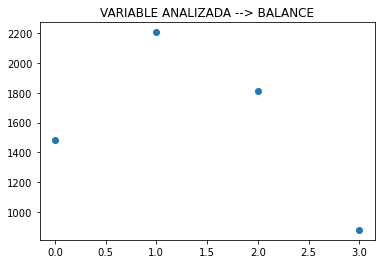

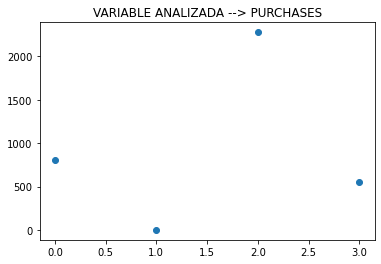

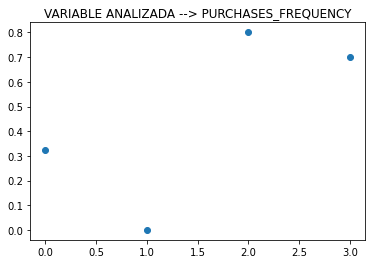

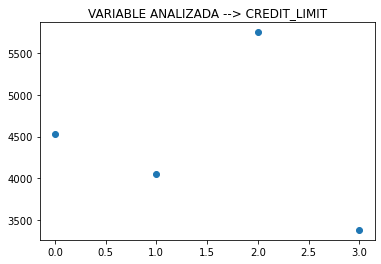

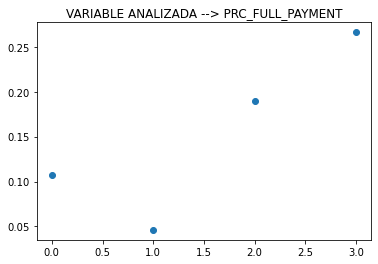

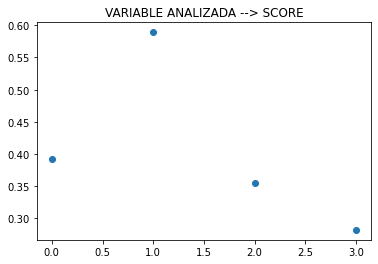

In [48]:
DATASET_AGRUPADO = DATASET.groupby("CLUST").mean()
COLUMNAS = ['BALANCE','PURCHASES', 'PURCHASES_FREQUENCY',
'CREDIT_LIMIT','PRC_FULL_PAYMENT','SCORE']
TENURE_INDEX = list(DATASET_AGRUPADO.index)

for X in COLUMNAS:
    ETIQUETA = "VARIABLE ANALIZADA --> " + str(X)
    plt.title(ETIQUETA)
    plt.scatter(TENURE_INDEX,DATASET_AGRUPADO[X])
    plt.show()